# Neural network - simple intro

### Initialisation

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

### Load data

In [2]:
breast_cancer_dataset = load_breast_cancer()

m_total = len(breast_cancer_dataset.target)

Y = breast_cancer_dataset.target.reshape(m_total, 1)
X = breast_cancer_dataset.data[:,np.r_[0:10]]
X_scaled = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3)
X_train, X_test, y_train, y_test = X_train.T, X_test.T, y_train.T, y_test.T 

### 2 Layer - NN

In [3]:
def init_params(layer_current, layer_previous):
    W = np.random.randn(layer_current, layer_previous)
    b = np.zeros((layer_current, 1), dtype=np.float32)
    return (W, b)

In [4]:
def feed_forward(prevA, W, b):
    return np.dot(W, prevA) + b
    
def sigmoid(Z):
    return (1/(1 + np.exp(-Z)))
    
def LeakyRelu(Z, leak_gradient=0.05):
    return np.maximum(leak_gradient * Z, Z)
    

In [5]:
def reLu_deriv(Z1, leak_gradient=0.05):
    Z1[Z1>0] = 1
    Z1[Z1<0] = leak_gradient
    return Z1

def feed_backward(params, cache, X, Y):
    m = Y.shape[1]
    W1, W2 = params['W1'], params['W2']
    b1, b2 = params['b1'], params['b2']
    
    A1, A2, Z1 = cache['A1'], cache['A2'], cache['Z1']
    
    dZ2 = A2 - Y
    dW2 = (1/m)*(np.dot(dZ2, A1.T))
    db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.multiply(np.dot(W2.T, dZ2), reLu_deriv(Z1))
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }
    
    return grads

In [6]:
def update_parameters(params, grads, learning_rate):
    return {
        "W1": params['W1'] - learning_rate * grads["dW1"],
        "W2": params['W2'] - learning_rate * grads["dW2"],
        "b1": params['b1'] - learning_rate * grads["db1"],
        "b2": params['b2'] - learning_rate * grads["db2"]
    }

In [7]:
def compute_cost(Y, Af):
    m = Y.shape[1]
    logprobs = np.multiply(Y, np.log(Af)) + np.multiply((1 - Y), np.log(1 -Af))
    return -np.sum(logprobs)/m

In [8]:
def Model(X, Y, layer_dims, learning_rate=0.01, num_iterations=100, debug=False):
    parameters = {}
    parameters["W1"], parameters["b1"] = init_params(layer_dims[0], X.shape[0])
    if debug: print("W1 shape : ",parameters["W1"].shape)

    parameters["W2"], parameters["b2"] = init_params(layer_dims[1],layer_dims[0])
    if debug: print("W2 shape : ",parameters["W2"].shape)
        
    costs = []
        
    for i in range(num_iterations):
        if debug and i%100 is 0: print("Iteration ",i)
        Z1 = feed_forward(X, parameters["W1"], parameters["b1"])
        A1 = LeakyRelu(Z1)

        Z2 = feed_forward(A1, parameters["W2"], parameters["b2"])
        A2 = sigmoid(Z2)
        
        cache = {
            "Z1": Z1,
            "A1": A1,
            "Z2": Z2,
            "A2": A2
        }
        
        cost = compute_cost(Y, A2)

        if debug and i%100 is 0: 
            costs.append(cost)
            print(cost)

        grads = feed_backward(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)
    
    print('Model trained !')
    return parameters, costs

In [9]:
def predict(parameters, X):
    Z1 = feed_forward(X, parameters["W1"], parameters["b1"])
    A1 = LeakyRelu(Z1)

    Z2 = feed_forward(A1, parameters["W2"], parameters["b2"])
    A2 = sigmoid(Z2)
    
    predictions = np.round(A2)
    return predictions

### Prediction & conclusion

W1 shape :  (12, 10)
W2 shape :  (1, 12)
Iteration  0
0.668289584879
Iteration  100
0.27934555263
Iteration  200
0.201031323995
Iteration  300
0.168756917817
Iteration  400
0.150981122857
Iteration  500
0.139559015698
Iteration  600
0.130247038152
Iteration  700
0.123407440794
Iteration  800
0.118179084571
Iteration  900
0.113896060553
Model trained !
Accuracy: 95%
[0.66828958487883294, 0.27934555263035032, 0.20103132399512189, 0.16875691781730523, 0.15098112285716495, 0.13955901569755161, 0.130247038151515, 0.12340744079409793, 0.11817908457148062, 0.11389606055302169]


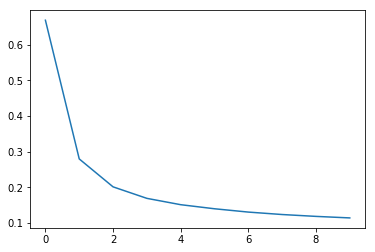

In [10]:
model_params, costs = Model(X_train, y_train,[12, 1], num_iterations=1000, debug=True, learning_rate=0.025)
predictions = predict(model_params, X_test)
print ('Accuracy: %d' % float((np.dot(y_test, predictions.T) + np.dot(1 - y_test, 1 - predictions.T)) / float(y_test.size) * 100) + '%')
print(costs)
pl = plot.plot(range(0, 10),costs)